# Uniform Distribution Modulo One Infinite Sequences

Integration, especially in higher dimensions, is a powerful tool used in a large variety of practical applications. One such example is in `give financial mathematics example`. 

As such, we often require integrals of $f(\bf{x})$ (that is, where $\bf{x}$ is an $s$-dimensional vector) that look like this:
$$
\begin{equation}
\int_{\left[ 0, 1 \right]^{s}} f \left( \bf{x} \right) d \bf{x}
\end{equation}
$$

where $\left[ 0, 1 \right]^{s}$ is the $s$-dimensional unit cube. However, for most functions $f(\bf{x})$ arising in practical applications, the integral above cannot be solved analytically. We thus turn to solving these integrals numerically - that is, finding algorithms that approximate the true value of the integral.

The central problem for these algorithms is efficiency. An algorithm that requires fewer iterations to achieve a desired accuracy (and thus has a smaller error) reduces the amount of time and computing power to determine the same result. The aim is to find deterministic constructions that best minimise error (well, at least better than random sampling). We use the quasi-Monte Carlo (QMC) method, with the rule

$$
\begin{equation}
Q_{N, s} \left( f \right) = \frac{1}{N} \sum_{n = 0}^{N - 1} f \left( \bf{x}_n \right)
\end{equation}
$$

We thus need sequences with points that are "well" distributed in the required s-dimensional volume (in this case, $\left[ 0, 1 \right) ^ {s}$) - which we define as Uniform Distribution Modulo One sequences. 

We define an infinite sequence $\mathcal{S} = \left( \bf{x}_{n} \right)_{n \in \mathbb{N}_{0}}$ in $\left[ 0, 1 \right) ^ {s}$ as $\textit{uniformly distributed modulo one}$ if for every interval of the form $\left[ \bf{a}, \bf{b} \right) \subseteq \left[ 0, 1 \right) ^ {s}$ we have

$$
\begin{equation}
\lim_{N \to \infty} \frac{A \left(\left[ \bf{a}, \bf{b} \right), \mathcal{S}, N \right)}{N}= \lambda_{s} \left(\left[ \bf{a}, \bf{b} \right) \right)
\end{equation}
$$

where $A \left( \left[ \bf{a}, \bf{b} \right), \mathcal{S}, N \right) = \{n \in \mathbb{N}_{0} : 0 \leq n \leq N - 1$ and $\bf{x}_{n} \in  \left[ \bf{a}, \bf{b} \right) \}$ and $\lambda_{s} \left(\left[ \bf{a}, \bf{b} \right) \right)$ refers to the s-dimensional Lebesgue measure, which reduces to $\prod^{s}_{j = 1} \left( b_j - a_j \right)$, where $\bf{a}$ $ = \{ a_1, a_2, ..., a_s \}, \bf{b}$ $ = \{ b_1, b_2, ..., b_s \}$. 

## Outline of Programme

This programme discusses several sequences that are uniformly distributed modulo one and how efficient each sequence in conducting numerical integration. Each sequence is tested for which bases provide the most efficient numerical integration, after which the best bases from each sequence are tested against each other.

In [3]:
# Additional Modules

import numpy as np
import matplotlib.pyplot as plt

## Van der Corput Sequences

some more words here about using vdc seq in halton seq

words about vdc seq construction, b-adic radical inverse functions etc

In [66]:
def phi(n, b):
    """
    Calculates the reflection of the b-adic digit expansion of n.
    """
    
    # Write n as a inverse b-adic digit expansion (in the form of a list)
    if n == 0: 
        return 0
    
    n_b = []
    digits = int(np.floor(np.log(n)/np.log(b)))
    
    for i in range(digits, -1, -1):
        dig, n = n // b**i, n % b**i 
        n_b.insert(0, dig)
        
    # Convert into a fraction
    ans = 0
    for i in range(digits+1):
        ans += n_b[i]/(b**(i+1))
    
    return ans

In [67]:
phi(8,2)

0.0625

In [68]:
phi(8,3)

0.8888888888888888

## Halton Sequences

some words about halton sequence and relation to van der corput and b-adic radical inverses

In [69]:
def haltonelement(n, bases):
    """
    Generates the nth Halton Sequence element, with bases b1, b2, ..., bs.
    """

    ans = []
    dim = len(bases)
    for i in range(dim):
        ans.append(phi(n, bases[i]))
    return ans

In [70]:
haltonelement(8, [2, 3])

[0.0625, 0.8888888888888888]

## Plotting the Halton Sequence

some other words

In [103]:
def haltonseq(N, bases):
    """
    Generates the Halton Sequence with bases b1, b2, ..., bs from n = 0 to n = N-1.
    """
    
    # Generate numpy array of coordinates
    dim = len(bases)
    points = np.zeros((N, dim))
    
    # Put in correct coordinates
    for i in range(N):
        points[i] = haltonelement(i, bases)
    
    return points

In [165]:
haltonseq(10, [2, 3, 5])

array([[0.        , 0.        , 0.        ],
       [0.5       , 0.33333333, 0.2       ],
       [0.25      , 0.66666667, 0.4       ],
       [0.75      , 0.11111111, 0.6       ],
       [0.125     , 0.44444444, 0.8       ],
       [0.625     , 0.77777778, 0.04      ],
       [0.375     , 0.22222222, 0.24      ],
       [0.875     , 0.55555556, 0.44      ],
       [0.0625    , 0.88888889, 0.64      ],
       [0.5625    , 0.03703704, 0.84      ]])

In [105]:
def haltonplot(N, bases):
    """
    Plots the 2-dimensional Halton Sequence with bases b1 and b2 from n = 0 to n = N-1.
    """
    
    if len(bases) != 2:
        print('Please set the dimension of the Halton Sequence to 2.')
        return 0
    
    points = np.transpose(haltonseq(N, bases))
    
    # Create plot
    fig1, ax1 = plt.subplots()
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])
    ax1.set_title('Halton Sequence Plot')
    
    # Plot points
    ax1.scatter(points[0], points[1], color = 'black', s = 0.1)

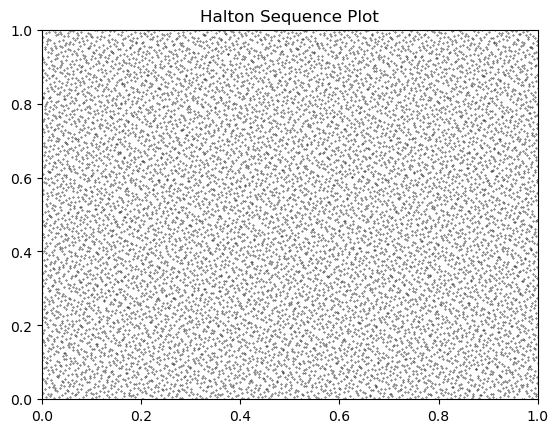

In [106]:
haltonplot(10000, [2, 3])

## Kronecker Sequences

ok essentially kronecker sequences (n-alpha sequences) is a, 2*a, 3*a, ... mod 1, and requires each of the values of a = (a1, a2, a3, a4, ...) to be linearly independent in the rationals

In [190]:
def kronelement(N, alpha):
    """
    Generates the (N)th s-dimensional Kronecker element given an s-dimensional vector alpha.
    """
    
    element = (N * np.array(alpha)) % 1
    
    return element

In [195]:
def kronseq(N, alpha):
    """
    Generates the s-dimensional Kronecker Sequence up to N points given an s-dimensional vector alpha.
    """
    
    dim = len(alpha)
    points = np.zeros((N, dim))
    
    for i in range(0, N):
        points[i] = kronelement(i+1, alpha) 
    
    return points

In [197]:
def kronplot(N, alpha):
    """
    Plots the 2-dimensional Kronecker Sequence with alpha a1 and a2 from n = 0 to n = N-1.
    
    """
    
    if len(alpha) != 2:
        print('Please set the dimension of the Kronecker Sequence to 2.')
        return 0
    
    points = np.transpose(kronseq(N, alpha))
    
    # Create plot
    fig1, ax1 = plt.subplots()
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])
    ax1.set_title('Kronecker Sequence Plot')
    
    # Plot points
    ax1.scatter(points[0], points[1], color = 'black', s = 0.1)

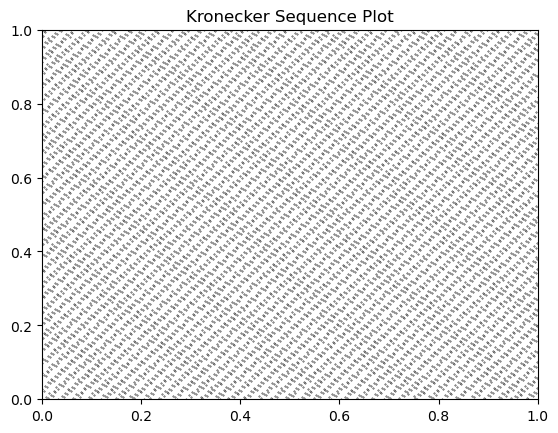

In [200]:
kronplot(10000, [np.sqrt(2), np.sqrt(3)])

## Using Uniform Distribution Modulo One Sequences in Quasi-Monte Carlo Integration

some words here and there using the formula

In [231]:
import inspect
from scipy import integrate

In [321]:
# Define the function and bounds in question
def func(x1, x2):
    return x1**(2*x2) - np.e**(2*x2+x1)

lower = [0, 0]
upper = [1, 1]

In [322]:
# Calculate the true value of the integral
def trueval(func, a, b):
    """
    Calculates the true value of the s-dimensional integral from vectors a = (a_1, a_2, ..., a_s)
    to b = (b_1, b_2, ..., b_s)
    """
    # Check if a, b and func inputs have same dimension
    function_signature = inspect.signature(func)
    dim = len(function_signature.parameters)
    if dim != len(a) or dim!= len(b):
        return 'Ensure the dimension across all three inputs are equal.'
    
    # Transpose Limits
    limits = np.transpose(np.array((a, b)))

    # Calculate integral
    integral, error = integrate.nquad(func, limits)
    
    return integral

In [323]:
truevalue = trueval(func, lower, upper)
print(truevalue)

-4.939793353629233


In [324]:
def QMC(N, func, seq, bases=[2,3], alpha=[np.sqrt(2), np.sqrt(3)]):
    """
    Generates the QMC approximation (given n points of a certain sequence) of the multivariate integral across the s-dimensional unit volume.
    """
    
    # Find points based on sequence
    if seq == 'halton':
        points = haltonseq(N, bases)
    elif seq == 'kronecker':
        points = kronseq(N, alpha)
    else:
        return 'seq is either halton or kronecker'
    
    answer = np.sum(np.array(func(points[0], points[1]))) / N
    
    return answer

In [325]:
QMC(100, func, 'halton', [2, 3])

-0.04666015869513721

In [326]:
QMC(100, func, 'kronecker', [np.sqrt(2), np.sqrt(3)])

-0.1221314294174999

In [327]:
def errorplot(ite, func, a, b, bases, alpha):
    """
    Plots the error of the approximation from the true value of the integral using different sizes of points.
    """
    # Calculate true value of integral
    truevalue = trueval(func, a, b)
    
    # Calculate errors
    haltonarr = []
    kronarr = []
    itearr = []
    for n in range(ite):
        N = 1000*n
        itearr.append(N)
        kronarr.append(abs(truevalue - Q(N, func, np.transpose(kronseq(N, alpha)))))
        haltonarr.append(abs(truevalue - Q(N, func, np.transpose(haltonseq(N, bases)))))
    
    # Create plot
    fig3, ax3 = plt.subplots()
    ax3.set_title('Deviation from True Value')
    
    # Plot points
    ax3.plot(itearr, haltonarr, color = 'blue')
    ax3.plot(itearr, kronarr, color = 'red')

/var/folders/rg/_zg8x1xx52b2b6jb92gd8t600000gn/T/ipykernel_43933/4101729186.py:6: RuntimeWarning: invalid value encountered in double_scalars
  answer = np.sum(np.array(func(points[0], points[1]))) / N


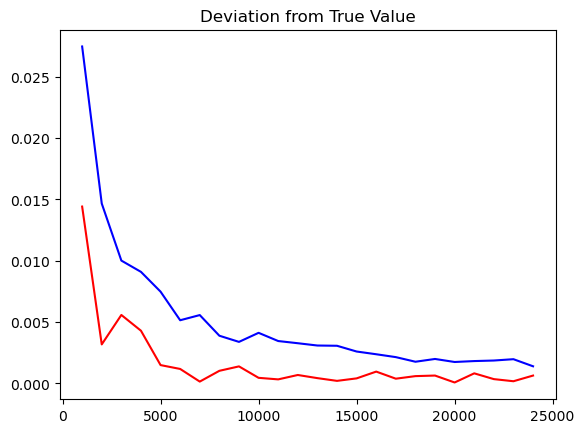

In [328]:
errorplot(25, func, lower, upper, [2, 3], [np.sqrt(2), np.sqrt(3)])